In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/flight-wn/encoded_flight_wn.csv
/kaggle/input/data-division-encodingandfitting/__results__.html
/kaggle/input/data-division-encodingandfitting/flight_weather.csv
/kaggle/input/data-division-encodingandfitting/__notebook__.ipynb
/kaggle/input/data-division-encodingandfitting/encoded_flight_wn.csv
/kaggle/input/data-division-encodingandfitting/custom.css
/kaggle/input/data-division-encodingandfitting/__output__.json
/kaggle/input/data-division-encodingandfitting/flight_wn.csv
/kaggle/input/data-division-encodingandfitting/encoded_flight_weather.csv


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
import category_encoders as ce 
from sklearn.pipeline import Pipeline

In [53]:
import seaborn as sns

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

In [55]:
df=pd.read_csv("/kaggle/input/data-division-encodingandfitting/flight_wn.csv")

In [56]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
0,1,1,4,WN,SFO,DEN,-2.0,967,-2.0,2015-01-01
1,1,1,4,WN,BOS,BWI,-4.0,369,-26.0,2015-01-01
2,1,1,4,WN,LAS,BWI,2.0,2106,-25.0,2015-01-01
3,1,1,4,WN,ABQ,HOU,7.0,759,22.0,2015-01-01
4,1,1,4,WN,PHX,SLC,1.0,507,-6.0,2015-01-01


In [57]:


train, test = train_test_split(df, test_size=0.4)

In [58]:
train

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
1221993,12,25,5,WN,MSY,DEN,0.0,1062,-13.0,2015-12-25
36684,1,12,1,WN,BWI,ISP,5.0,220,0.0,2015-01-12
1153791,12,5,6,WN,LAS,SAN,-3.0,258,-10.0,2015-12-05
104127,2,3,2,WN,SJC,SNA,-2.0,342,-10.0,2015-02-03
442469,5,14,4,WN,HOU,BNA,1.0,670,-6.0,2015-05-14
...,...,...,...,...,...,...,...,...,...,...
294537,4,1,3,WN,PHX,DAL,69.0,879,63.0,2015-04-01
314188,4,7,2,WN,MCO,BWI,-1.0,787,-13.0,2015-04-07
602278,6,28,7,WN,MCO,BNA,5.0,616,-11.0,2015-06-28
960403,10,9,5,WN,13796,14107,12.0,646,3.0,2015-10-09


In [59]:
encoding_pipeline = Pipeline([
  
  ('encode_origin', ce.TargetEncoder(cols=['ORIGIN_AIRPORT'], return_df=True)),
  ('encode_destination', ce.TargetEncoder(cols=['DESTINATION_AIRPORT'], return_df=True)),
  ('encode_month', ce.TargetEncoder(cols=['MONTH'], return_df=True))
])

# Get the encoded dataset:
e_train = encoding_pipeline.fit_transform(train, train['ARRIVAL_DELAY'])

e_test = encoding_pipeline.transform(test)


In [60]:
e_test.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
969845,-0.629308,12,1,WN,1.672434,-0.630354,-4.0,446,-10.0,2015-10-12
742410,5.422550,6,4,WN,7.506273,1.510596,17.0,883,5.0,2015-08-06
599306,11.012736,27,6,WN,7.689733,3.588049,79.0,587,82.0,2015-06-27
891716,-1.322491,19,6,WN,6.337099,5.777268,157.0,1670,136.0,2015-09-19
97447,3.326742,31,6,WN,6.217956,8.465618,-4.0,668,-15.0,2015-01-31


In [61]:
combined = pd.concat([e_train, e_test], ignore_index=True)

In [62]:
combined.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,Date
0,6.655211,25,5,WN,2.264675,1.510596,0.0,1062,-13.0,2015-12-25
1,3.326742,12,1,WN,7.689733,10.070872,5.0,220,0.0,2015-01-12
2,6.655211,5,6,WN,6.736009,5.588703,-3.0,258,-10.0,2015-12-05
3,3.460959,3,2,WN,6.999762,2.442244,-2.0,342,-10.0,2015-02-03
4,5.516707,14,4,WN,7.506273,3.588049,1.0,670,-6.0,2015-05-14


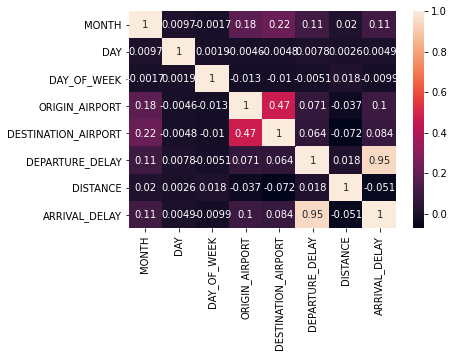

In [63]:
sns.heatmap(e_train.corr(),annot=True)


In [64]:
X_1=combined[['MONTH','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DISTANCE']]
y_1=combined['ARRIVAL_DELAY']
X=X_1.to_numpy()
y=y_1.to_numpy()

In [65]:
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
#     models['svm'] = SVR()
    return models

In [66]:
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

In [67]:
models = get_models()

In [68]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>knn -21.017 (0.045)
>cart -18.864 (0.029)


KeyboardInterrupt: 

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()